## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

## **I - Exploration of the dataset**

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!
#load packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data file
df_office = pd.read_csv('datasets/office_episodes.csv')
df_office.head()


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


### **a-Data preprocessing**

In [3]:
df_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [4]:
df_office.isnull().sum()

episode_number      0
season              0
episode_title       0
description         0
ratings             0
votes               0
viewership_mil      0
duration            0
release_date        0
guest_stars       159
director            0
writers             0
has_guests          0
scaled_ratings      0
dtype: int64

There are no null values for most of the variables except for the guest_stars. However, there is no need to worry because we only fill in the boxes where the guests appear.

In [5]:
df_office.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


This table summarizes the data description.

### **b-Analysis**

Text(0.5, 1.0, 'Ratings of season')

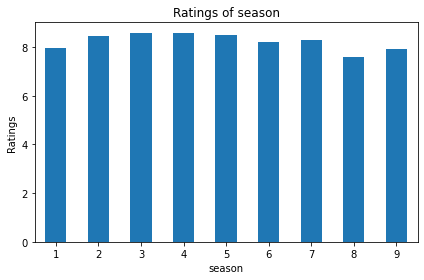

In [6]:
df_office.groupby("season")["ratings"].mean().plot.bar(rot=0)
plt.ylabel("Ratings")
plt.title("Ratings of season")

There is not a big difference between the seasons and the rating. The season with the lowest rating is the one of the number 8. 

Text(0.5, 1.0, 'The directors who have most supervised the Office')

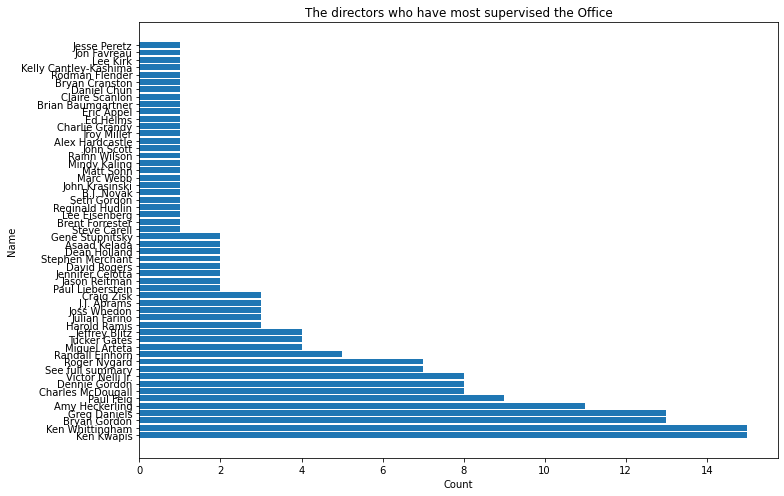

In [7]:
plt.rcParams['figure.figsize'] = [11, 7]
x= df_office["director"].unique()
y = df_office["director"].value_counts(sort=True)
plt.barh(x, y)
plt.xlabel("Count")
plt.ylabel("Name")
plt.title("The directors who have most supervised the Office")

The directors who most supervised the Tv Show are Ken Whittingham and Ken Kwapis.

Text(0.5, 1.0, 'Popularity of seasons')

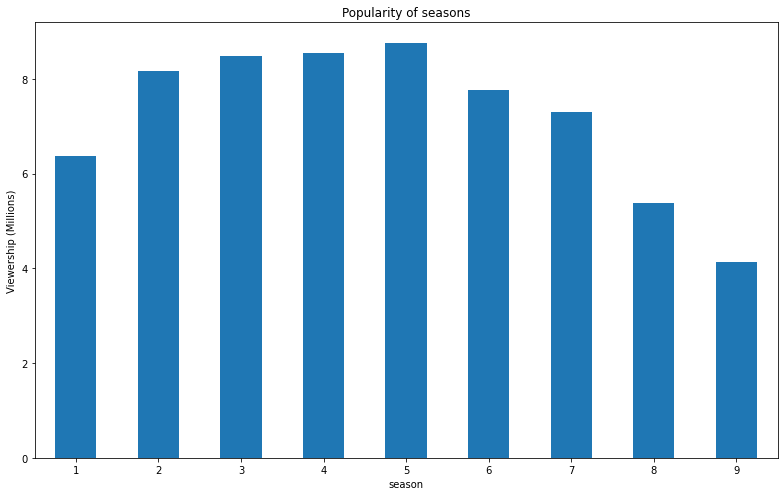

In [8]:
df_office.groupby("season")["viewership_mil"].mean().plot.bar(rot=0)
plt.ylabel("Viewership (Millions)")
plt.title("Popularity of seasons")

We notice an ascending growth of the number of views from the first season to the fifth. Beyond that, the number of views of the last four seasons have been reduced. So season  five (5) was the most viewed.

In [9]:
round(df_office.corr(),2).sort_values(by="viewership_mil", ascending=True)

,episode_number,season,ratings,votes,viewership_mil,duration,has_guests,scaled_ratings
episode_number,1.00,0.99,-0.38,-0.41,-0.61,0.07,0.04,-0.38
season,0.99,1.00,-0.38,-0.43,-0.56,0.08,0.05,-0.38
has_guests,0.04,0.05,-0.03,0.10,0.04,0.08,1.00,-0.03
duration,0.07,0.08,0.45,0.42,0.32,1.00,0.08,0.45
votes,-0.41,-0.43,0.65,1.00,0.47,0.42,0.10,0.65
ratings,-0.38,-0.38,1.00,0.65,0.49,0.45,-0.03,1.00
scaled_ratings,-0.38,-0.38,1.00,0.65,0.49,0.45,-0.03,1.00
viewership_mil,-0.61,-0.56,0.49,0.47,1.00,0.32,0.04,0.49


The correlation between the number of views and the number of episodes is strong. But there is a weak correlation between the number of views and the duration of the episodes.

### **II-Datacamp question**

*Q1: Relation between number of episode and viewership*

In [10]:
color = []

for lab, row in df_office.iterrows():
    if row['scaled_ratings']< 0.25:
        color.append("red")
    elif (row['scaled_ratings'] >= 0.25) & (row['scaled_ratings'] < 0.5):
        color.append("orange")
    elif (row['scaled_ratings'] >= 0.50) & (row['scaled_ratings'] < 0.75):
        color.append("lightgreen")
    else:
        color.append("darkgreen")
print(df_office.shape)

(188, 14)


The colors are arranged according to the ratings.

In [11]:
size = []
for lab, row in df_office.iterrows():
    if row["has_guests"] == True:
        size.append(250)
    else:
        size.append(25)
        
print(len(size))
    

188


Also, the size of the point will depend on the presence of star guets or not.

Text(0, 0.5, 'Viewership (Millions)')

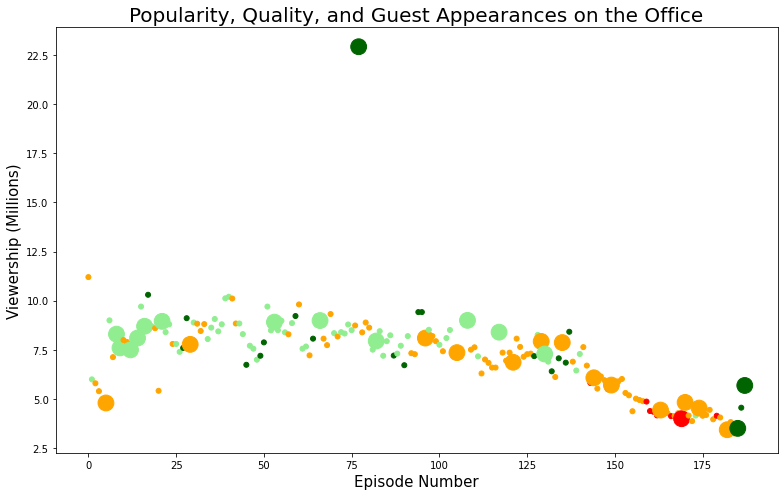

In [12]:
fig = plt.figure(figsize=(11, 7))
#subsetting 
plt.scatter(x='episode_number', y='viewership_mil', data=df_office, c=color, s=size)
#title label 
plt.title("Popularity, Quality, and Guest Appearances on the Office", size=20)

# x_axis and y_axis label
plt.xlabel("Episode Number", size=15)
plt.ylabel("Viewership (Millions)", size=15)

The creation of the scatter plot shows the popularity, quality and appeal. We can see here that the episode number 77 with the presence of the guests was the most viewed. However, in general, the number of views decreased with each episode.

*Q2: One of the guest stars who were/was in the most watched Office episode?*

In [13]:
df_office["viewership_mil"] == df_office["viewership_mil"].max()

0      False
1      False
2      False
3      False
4      False
       ...  
183    False
184    False
185    False
186    False
187    False
Name: viewership_mil, Length: 188, dtype: bool

In [14]:
df_office.loc[df_office["viewership_mil"] == df_office["viewership_mil"].max()]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875


In [15]:
max_viewer = df_office.loc[df_office["viewership_mil"] == df_office["viewership_mil"].max()]
max_viewer["guest_stars"].values[0].split(",")[0]

'Cloris Leachman'

In [16]:
top_star = max_viewer["guest_stars"].values[0].split(",")[0]
print(top_star)

Cloris Leachman


Cloris Leachman is one of the people in the guest stars category in episode 77.

## **Conclusion**

The office Tv Show had a good scope in general and was also well rated. It is recommended to those who have not yet seen it.